# Character and Word Analysis on Hate Speech and Abusive Tweets in Indonesian using Descriptive Analytics

# Data Preparation

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import re
import sqlite3
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv("archive/data.csv", encoding="latin-1")

## Check first and last data

In [3]:
# let's check the begining 5 of the data
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
# also the last 5 of the data
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


## Check the data length and its number of column

In [5]:
df.shape

(13169, 13)

## Check completeness of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


## Check if there are null values

In [7]:
# make sure if there are null values
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

## Check the number of unique values

In [8]:
# check the unique values
df.nunique()

Tweet            13023
HS                   2
Abusive              2
HS_Individual        2
HS_Group             2
HS_Religion          2
HS_Race              2
HS_Physical          2
HS_Gender            2
HS_Other             2
HS_Weak              2
HS_Moderate          2
HS_Strong            2
dtype: int64

## Find duplicates in data and remove if any

In [9]:
df.duplicated().sum()

125

In [10]:
df[df.duplicated() == True]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
295,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
378,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
1559,Presiden yang anda tuduh Rezim anti Islam suda...,1,0,1,0,0,0,0,0,1,1,0,0
1565,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0
1583,Saya suka video USER,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,I added a video to a USER playlist,0,0,0,0,0,0,0,0,0,0,0,0
12952,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0
12953,"SETUJU SAYA,KLAU AHOK DAPAT GELAR SANTRI KEHOR...",1,1,1,0,0,0,0,0,1,1,0,0
12985,USER ahmad dhani yang terhormat paling babi pa...,1,1,1,0,0,0,0,1,0,1,0,0


In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## Create a text cleaning function

In [12]:
def cleanText(text):
    cleanedtext = text.lower()
    cleanedtext = re.sub(r'http\S+', '', cleanedtext) #URL removal
    cleanedtext = re.sub(r"url", ' ', cleanedtext) # 'url' string removal
    cleanedtext = re.sub(r"rt", ' ', cleanedtext) # retweet removal
    cleanedtext = re.sub(r"user", ' ', cleanedtext) # USER removal
    cleanedtext = re.sub(r"\\n", ' ', cleanedtext) # newline removal
    cleanedtext = re.sub(r"\\\w{3}", '', cleanedtext) # emoticon removal
    cleanedtext = re.findall(r"[\w]+",cleanedtext) # symbols removal
    return ' '.join(cleanedtext)

In [13]:
df['Cleaned'] = df.Tweet.apply(cleanText)
df['Cleaned']

0        disaat semua cowok berusaha melacak perhatian ...
1        siapa yang telat ngasih tau elu edan sarap gue...
2        41 kadang aku berfikir kenapa aku tetap percay...
3        aku itu aku ku tau matamu sipit tapi diliat da...
4        kaum cebong kapir udah keliatan dongoknya dari...
                               ...                        
13164    jangan asal ngomong ndasmu congor lu yg sekate...
13165                               kasur mana enak kunyuk
13166                     hati hati bisu g lagi bosan huft
13167    bom yang real mudah terdeteksi bom yang terkub...
13168         mana situ ngasih itu cuma foto ya kutil onta
Name: Cleaned, Length: 13044, dtype: object

## Create a new column containing total number of character of cleaned tweet

In [14]:
df['Total_char'] = df.Cleaned.apply(len)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Cleaned,Total_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,127
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gue...,105
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...,248
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi diliat da...,61
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari...,78


## Create a new column containing total number of word of cleaned tweet

In [15]:
df['Total_word'] = df.Cleaned.apply(lambda words: len(words.split()))
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Cleaned,Total_char,Total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,127,21
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gue...,105,19
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...,248,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi diliat da...,61,13
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari...,78,12


## Check if cleaned tweet contains empty string

In [16]:
df.Cleaned.loc[df['Total_char'] == 0].count()

13

In [17]:
print("before", df.shape)
df.drop(df.index[df['Total_char'] == 0], inplace = True)
df = df.reset_index(drop=True)
print("after",df.shape)

before (13044, 16)
after (13031, 16)


In [18]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Cleaned,Total_char,Total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,127,21
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gue...,105,19
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...,248,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi diliat da...,61,13
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari...,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13026,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor lu yg sekate...,54,9
13027,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,22,4
13028,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu g lagi bosan huft,32,7
13029,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...,114,18


## Create a new translated tweet column from cleaned tweet

In [19]:
# open the translation
df_kamus = pd.read_csv("archive/new_kamusalay.csv", encoding='latin-1')
df_kamus = df_kamus.reset_index()

def openCon():
    conn = None
    try:
        conn = sqlite3.connect("kamus.db")
    except Error as e:
        print(e)
    return conn

def closeCon(con):
    con.close()

def checkDict(word):
    conn = openCon()
    cur = conn.cursor()
    cur.execute("SELECT `anak jakarta asyik asyik` FROM kamus where anakjakartaasikasik = '"+word+"' ")
    row = cur.fetchone()
    if row:
        return row[0]
    else:
        return None
    closeCon(conn)
    
    
def translateSentence(sentence):
    output = ''
    for word in sentence.split(" "):
        translate = checkDict(word) # replace word to non alay
        if translate:
            word = translate
        output = output +' '+ word
    return output.strip()

def stopwordRemove(text):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    output = stopword.remove(text)
    return output 

def textStem(text):
    # print('-',end='')
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output   = stemmer.stem(text)
    return output

In [ ]:
# df['Translated'] = df.Cleaned.apply(translateSentence)
# df.to_csv('archive/analysis_ready1.csv')
# df = pd.read_csv("archive/analysis_ready1.csv")
# print('Translate Completed')
# df['Translated'] = df.Translated.apply(stopwordRemove)
# df.to_csv('archive/analysis_ready2.csv')
df = pd.read_csv("archive/analysis_ready2.csv")
print('Stopword Removal Completed')
df['Translated'] = df.Translated.apply(textStem)
df.to_csv('archive/analysis_ready3.csv')
df = pd.read_csv("archive/analysis_ready3.csv")
print('Word Stemming Completed')
df['Translated']

Stopword Removal Completed


# Save dataframe for analysis

In [ ]:
df.to_csv('archive/analysis_ready.csv')
df = pd.read_csv("archive/analysis_ready.csv")

# Univariate Analysis
For analysis, we will use the cleaned tweet, since both total word and total char can be very different from the original tweet, depends on the translation

## Descriptive Statistic

In [22]:
df.loc[:,['Total_char','Total_word']].describe()

,Total_char,Total_word
count,13031.000000,13031.000000
mean,99.315632,16.291612
std,65.320771,10.586304
min,1.000000,1.000000
25%,47.000000,8.000000
50%,86.000000,14.000000
75%,134.000000,22.000000
max,293.000000,85.000000


In [23]:
df.loc[:,['Total_char','Total_word']].mean()

Total_char    99.315632
Total_word    16.291612
dtype: float64

In [24]:
df.loc[:,['Total_char','Total_word']].median()

Total_char    86.0
Total_word    14.0
dtype: float64

In [25]:
df.loc[:,['Total_char','Total_word']].mode()

,Total_char,Total_word
0,65,10


### Check outlier

In [26]:
def describeQuartile(df, colname):
    p0 = df[colname].min()
    p100 = df[colname].max()

    q1 = df[colname].quantile(0.25)
    q2 = df[colname].quantile(0.5)
    q3 = df[colname].quantile(0.75)
    iqr = q3-q1
    print('Interquartile value:',iqr)

    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr

    print("Lower limit:", lower_limit)
    print("Min value", p0)

    if lower_limit < p0:
      print("Some outlier occurs on lower limit")
    else:
      print("Some outlier occurs on lower limit")

    print()
    print("Upper limit:", upper_limit)
    print("Max value", p100)

    if upper_limit > p100:
      print("No outlier occurs on upper limit")
    else:
      print("Some outlier occurs on upper limit")
    
    outlier = df[colname][np.bitwise_or(df[colname] > upper_limit, df[colname] < lower_limit)].count()
    print("Num of outliers:",outlier)
    
    print('----Removing outliers----')
    print('Shape before',df.shape)
    df = df.loc[(df[colname] > lower_limit) & (df[colname] < upper_limit)]
    df = df.reset_index(drop=True)
    print('Shape after',df.shape)
    outlier = df[colname][np.bitwise_or(df[colname] > upper_limit, df[colname] < lower_limit)].count()
    print("Num of outliers:",outlier)

In [27]:
describeQuartile(df, 'Total_char')

Interquartile value: 87.0
Lower limit: -83.5
Min value 1
Some outlier occurs on lower limit

Upper limit: 264.5
Max value 293
Some outlier occurs on upper limit
Num of outliers: 19
----Removing outliers----
Shape before (13031, 20)
Shape after (13012, 20)
Num of outliers: 0


In [28]:
describeQuartile(df, 'Total_word')

Interquartile value: 14.0
Lower limit: -13.0
Min value 1
Some outlier occurs on lower limit

Upper limit: 43.0
Max value 85
Some outlier occurs on upper limit
Num of outliers: 118
----Removing outliers----
Shape before (13031, 20)
Shape after (12858, 20)
Num of outliers: 0


## Check Skewness
From the data shown, it can be described that both total char and total word have positive skewness

In [29]:
df.loc[:,['Total_char','Total_word']].skew()

Total_char    0.754515
Total_word    0.855159
dtype: float64

## Check Kurtosis
The kurtosis value of both total char and total word are less than 3, therefore it has smaller number of outliers

In [30]:
df.loc[:,['Total_char','Total_word']].kurtosis()

Total_char   -0.375302
Total_word    0.048457
dtype: float64

# Visualization

<AxesSubplot: >

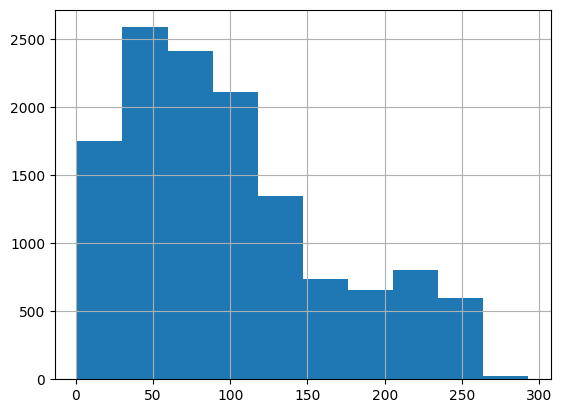

In [31]:
df.Total_char.hist()

<AxesSubplot: >

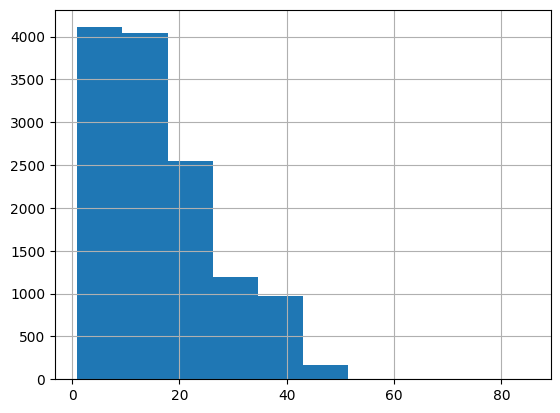

In [32]:
df.Total_word.hist()

array([[<AxesSubplot: title={'center': 'Total_char'}>,
        <AxesSubplot: title={'center': 'Total_word'}>]], dtype=object)

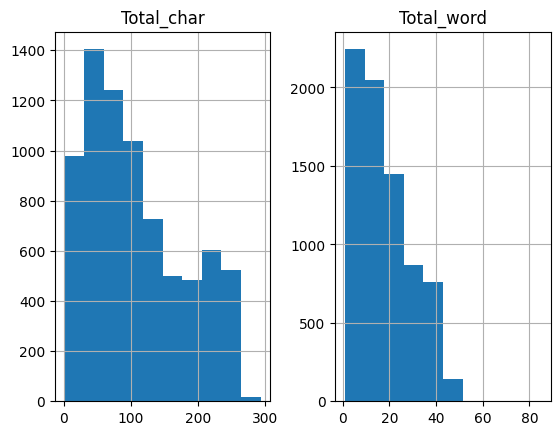

In [33]:
df_hs_negative = df.loc[df['HS'] == 0]
df_hs_negative = df_hs_negative.loc[:,['Total_char','Total_word']]
df_hs_negative.hist()

array([[<AxesSubplot: title={'center': 'Total_char'}>,
        <AxesSubplot: title={'center': 'Total_word'}>]], dtype=object)

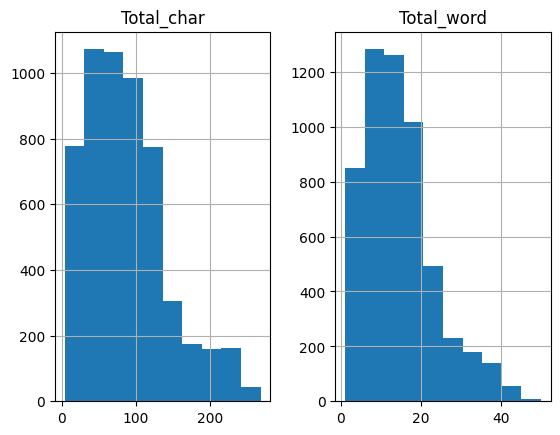

In [34]:
df_hs_positive = df.loc[df['HS'] == 1]
df_hs_positive = df_hs_positive.loc[:,['Total_char','Total_word']]
df_hs_positive.hist()

array([[<AxesSubplot: title={'center': 'Total_char'}>,
        <AxesSubplot: title={'center': 'Total_word'}>]], dtype=object)

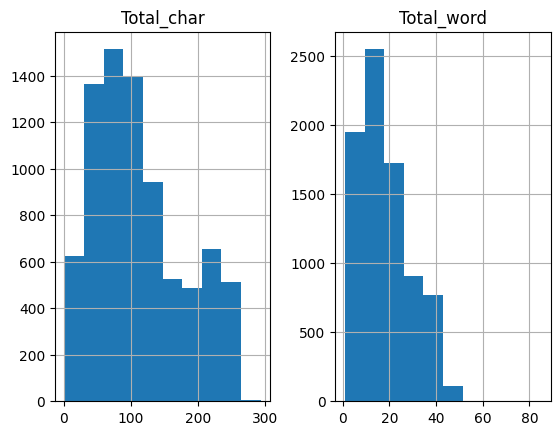

In [35]:
df_abusive_negative = df.loc[df['Abusive'] == 0]
df_abusive_negative = df_abusive_negative.loc[:,['Total_char','Total_word']]
df_abusive_negative.hist()

array([[<AxesSubplot: title={'center': 'Total_char'}>,
        <AxesSubplot: title={'center': 'Total_word'}>]], dtype=object)

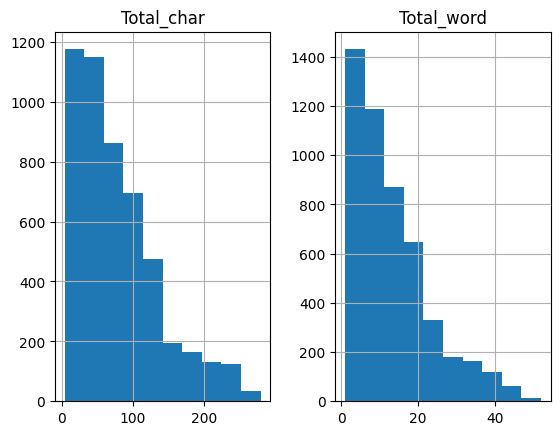

In [36]:
df_abusive_positive = df.loc[df['Abusive'] == 1]
df_abusive_positive = df_abusive_positive.loc[:,['Total_char','Total_word']]
df_abusive_positive.hist()

In [37]:
def topTenFrequentWord(df):
    top10 = pd.Series(' '.join(df).split()).value_counts()[:10]
    print(top10)

In [38]:
df_hs_negative_tweet = df.loc[df['HS'] == 0].Cleaned
print("Top 10 hate speech negative cleaned tweet")
topTenFrequentWord(df_hs_negative_tweet)

df_hs_negative_translated = df.loc[df['HS'] == 0].Translated
print("Top 10 hate speech negative translated tweet")
topTenFrequentWord(df_hs_negative_translated)

Top 10 hate speech negative cleaned tweet
dan         1955
di          1798
yg          1692
yang        1575
itu         1062
ini          969
ada          967
aku          668
orang        603
presiden     581
dtype: int64
Top 10 hate speech negative translated tweet


TypeError: sequence item 4013: expected str instance, float found

In [ ]:
df_hs_positive_tweet = df.loc[df['HS'] == 1].Cleaned
print("Top 10 hate speech positive cleaned tweet")
topTenFrequentWord(df_hs_positive_tweet)

df_hs_positive_translated = df.loc[df['HS'] == 1].Translated
print("Top 10 hate speech positive translated tweet")
topTenFrequentWord(df_hs_positive_translated)

In [ ]:
df_abusive_negative_tweet = df.loc[df['Abusive'] == 0].Cleaned
print("Top 10 abusive negative cleaned tweet")
topTenFrequentWord(df_abusive_negative_tweet)

df_abusive_negative_translated = df.loc[df['Abusive'] == 0].Translated
print("Top 10 abusive negative translated tweet")
topTenFrequentWord(df_abusive_negative_translated)